<a href="https://colab.research.google.com/github/luvbenz/2025-CV/blob/hw2/2-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Fig0309(a)(washed_out_aerial_image).tif to Fig0309(a)(washed_out_aerial_image) (1).tif


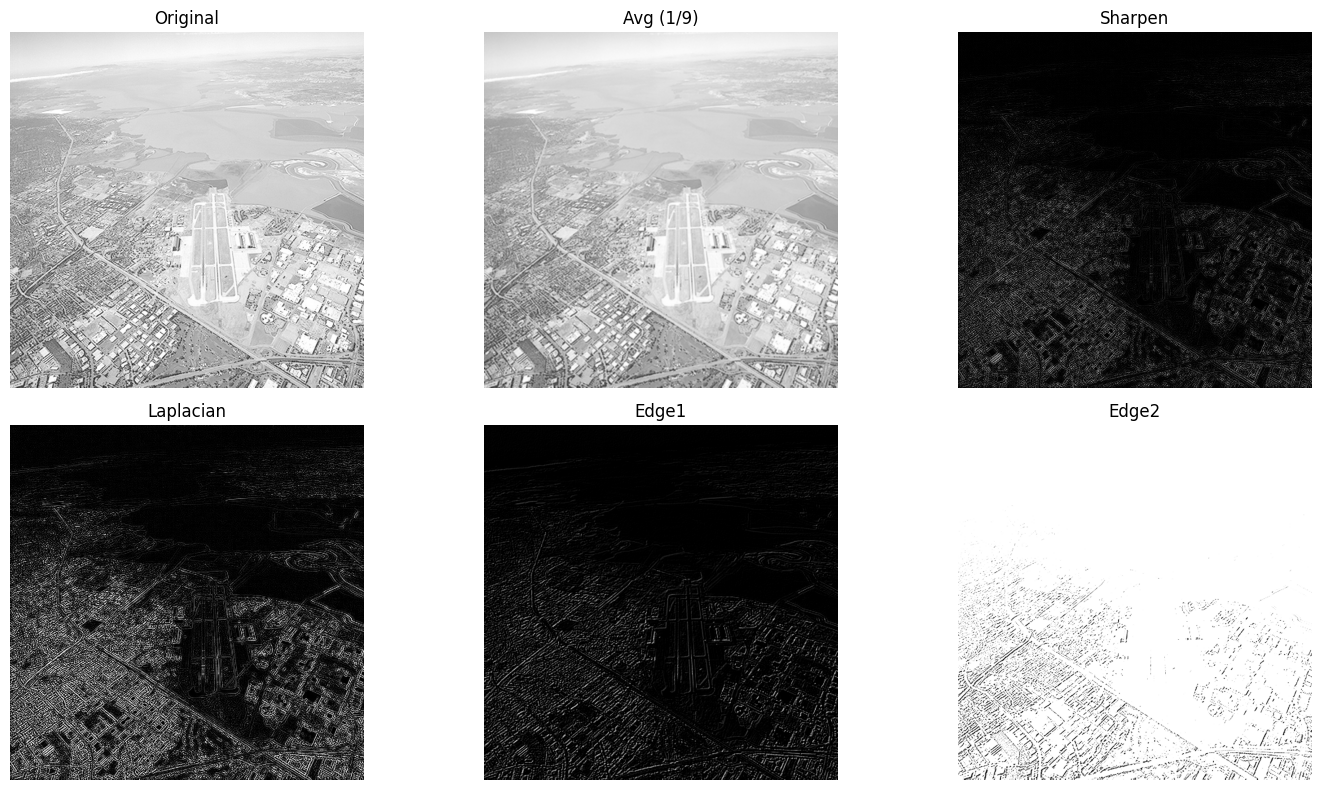

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 파일 업로드 선택창 호출
uploaded = files.upload()

# 이미지 불러오기
img = cv.imread('Fig0309(a)(washed_out_aerial_image).tif')

# 마스크 정의
kernel_avg = np.ones((3, 3), np.float32) / 9
kernel_sharpen = np.array([[ 0, -1,  0], [-1, 4, -1], [ 0, -1,  0]], np.float32)
kernel_laplacian = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], np.float32)
kernel_edge1 = np.array([[-1, 0, 0], [0, 0, 0], [0, 0, 1]], np.float32)
kernel_edge2 = np.array([[0, -1, 0], [-1, 1, 1], [0, 1, 1]], np.float32)

# 필터 적용
avg       = cv.filter2D(img, -1, kernel_avg)
sharpen   = cv.filter2D(img, -1, kernel_sharpen)
laplacian = cv.filter2D(img, -1, kernel_laplacian)
edge1     = cv.filter2D(img, -1, kernel_edge1)
edge2     = cv.filter2D(img, -1, kernel_edge2)

# 출력
titles = ['Original', 'Avg (1/9)', 'Sharpen', 'Laplacian', 'Edge1', 'Edge2']
images = [img, avg, sharpen, laplacian, edge1, edge2]

plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    # 컬러 이미지는 BGR 에서 RGB 변환
    img_to_show = cv.cvtColor(images[i], cv.COLOR_BGR2RGB) if len(images[i].shape) == 3 else images[i]
    plt.imshow(img_to_show, cmap='gray' if len(images[i].shape) == 2 else None)
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
